In [1]:
from ptiming_ana.phaseogram import *
from lstchain.io.io import dl2_params_lstcam_key,dl2_params_src_dep_lstcam_key
from astropy.io import fits
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import Image
import numpy as np

# Creating the PulsarAnalysis object and settings

In [54]:
h=PulsarAnalysis()
h.set_config('./example_data/config_tutorial.yaml')

## Alternatively

In [62]:
h=PulsarAnalysis()

In [63]:
h.setBackgroundLimits([0.52,0.87])
h.setPeaklimits(P1_limits=[0,0.026,0.983,1],P2_limits=[0.377,0.422],P3_limits=None)

In [64]:
h.setBinning(50,xmin=0,xmax=1)

In [65]:
h.setTimeInterval(tint=3600*24)

In [66]:
h.setFittingParams(model='dgaussian',binned=True)

In [67]:
h.setEnergybinning(np.geomspace(0.1/1e3,1/1e3, 3), do_diff=True,do_integral=False) #In TeV

# Extracting phases, times and energies from file and give them to the object

#### For Fermi data there is a class to read these lists and use them in the main object.

In [68]:
h.setFermiInputFile('./example_data/merged2_pulsar.fits')

#### But in general we can read our file (FITS, DL2, DL3...) and extract phases, times and energies as lists and read them as follows:

In [69]:
f=fits.open('./example_data/merged2_pulsar.fits')
fits_table=f[1].data

In [70]:
times=np.sort(fits_table['BARYCENTRIC_TIME'].byteswap().newbyteorder())
phases=fits_table['PULSE_PHASE'].byteswap().newbyteorder()
energies=fits_table['ENERGY'].byteswap().newbyteorder()

In [71]:
h.setListsInput(phases,times,energies/1e6,tel='fermi',energy_units='TeV')

In [72]:
h.get_results = False

# Run the code

In [73]:
h.run()

2023-12-05 12:13:00 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Initializing...
2023-12-05 12:13:00 INFO   [ptiming_ana.phaseogram.read_events]     Finishing reading. Total time is 8342.590926586941 s

2023-12-05 12:13:00 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Calculating statistics every 1440.0 minutes...
2023-12-05 12:13:17 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Fitting the data to the given model...
2023-12-05 12:13:17 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Fit model: dgaussian
2023-12-05 12:13:17 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Binned fitting: True
2023-12-05 12:13:17 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Performing energy-dependent analysis...
2023-12-05 12:13:17 INFO   [ptiming_ana.phaseogram.penergy_analysis] Creating object in energy range (TeV):0.00-0.00
2023-12-05 12:13:17 INFO   [ptiming_ana.phaseogram.penergy_analysis] Calculating statistics...
2023-12-05 12:13:25 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Fittin

# Show the results

## Overall results

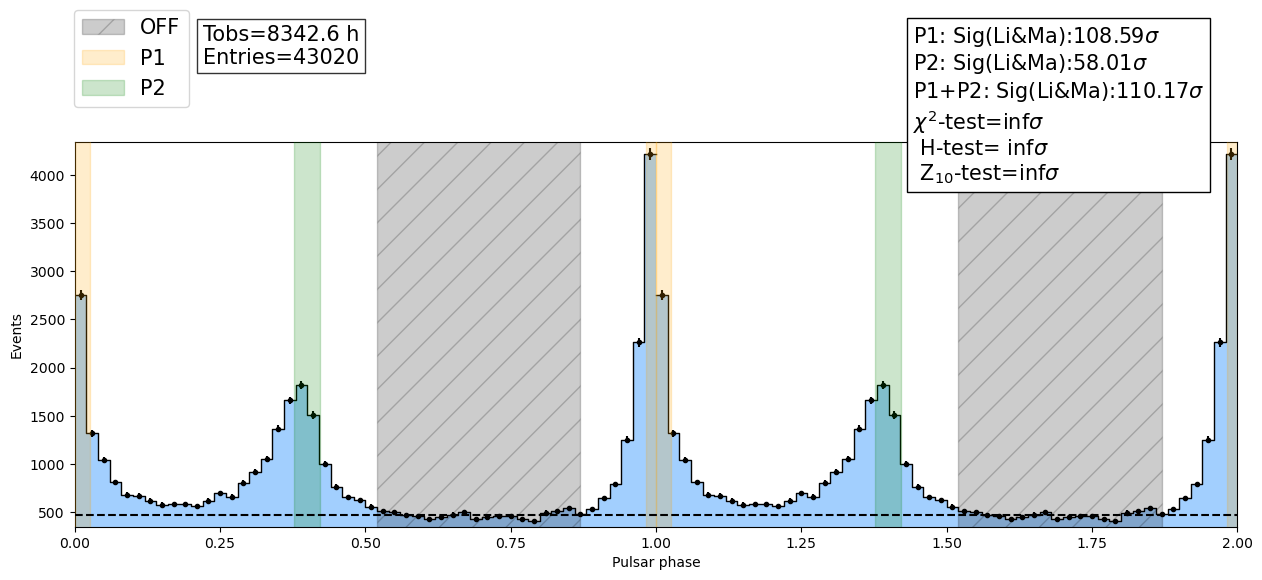

In [74]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='xkcd:baby blue')

In [75]:
results=h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2         P1+P2
Significance   108.591359    58.006568    110.165719
Nex           5959.237143  2677.271429   8636.508571
Nex_error       84.220286    62.208240    105.936656
Number        6969.000000  3734.000000  10703.000000
noff          1009.762857  1056.728571   2066.491429
sign_t_ratio   451.841088   241.361292    458.391889
s/n ratio      187.534413    82.358927    189.985915

P1/P2 ratio=2.23+/-0.06


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test       Zn_test        H_test
Statistic              2.697743e+04  2.599217e+04  2.810141e+04
p-value                0.000000e+00  0.000000e+00  0.000000e+00
Number of $\sigma$              inf           inf           inf


## Result of the fitting

In [76]:
h.fit_model

'dgaussian'

In [77]:
fit_result=h.show_fit_results()

      Name       Value      Error
0       mu    0.992422   0.001566
1    sigma    0.026298   0.001470
2     mu_2    0.376341   0.004402
3  sigma_2    0.050986   0.004192
4        A  466.437500   0.000000
5        B  200.227100  10.903135
6        C  145.133321  11.042156


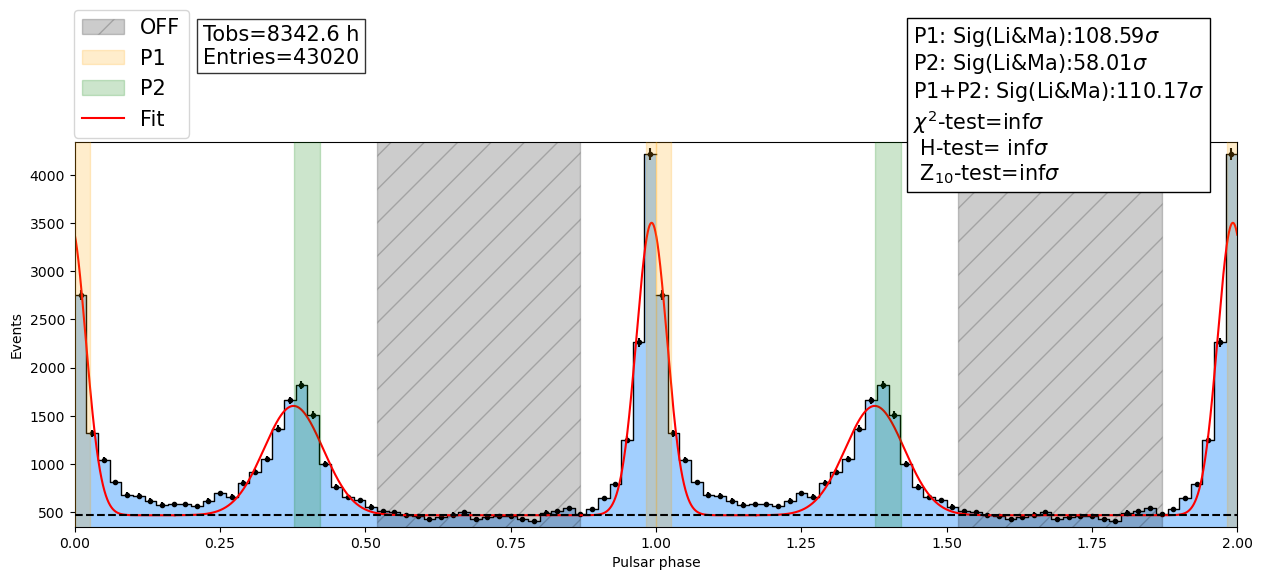

In [78]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='xkcd:baby blue',fit=True)

## Results vs Time

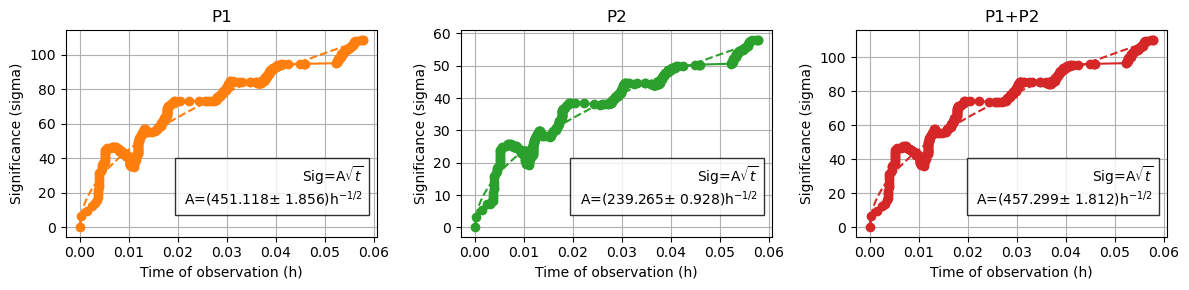

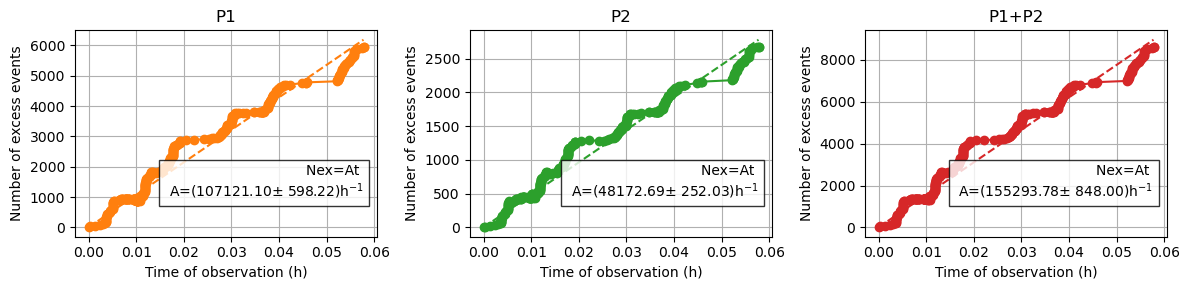

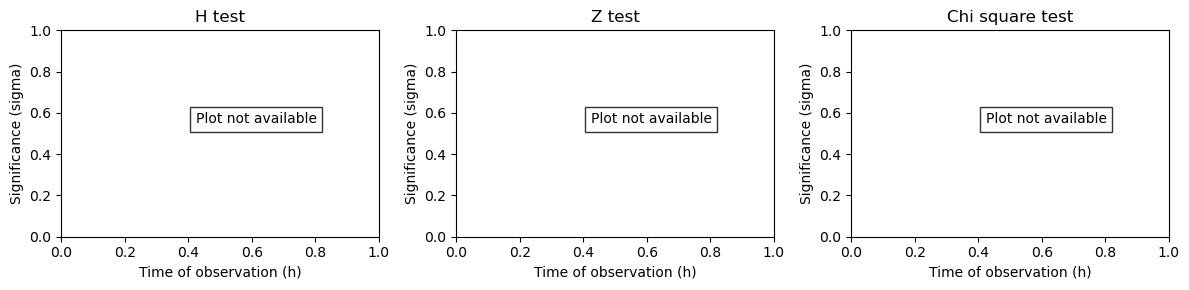

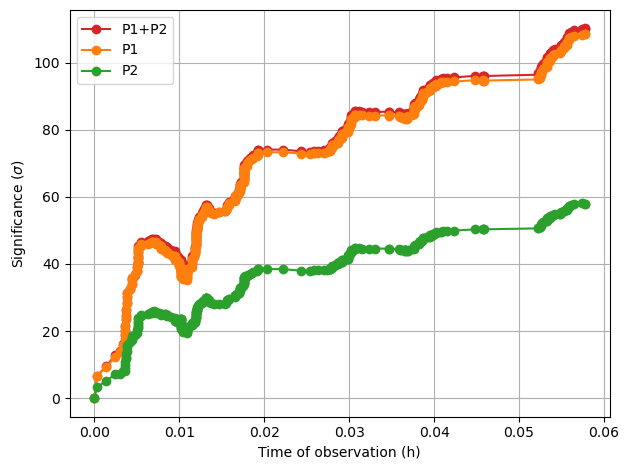

In [79]:
TimeEv=h.show_timeEvolution()

The periodicity tests are not available since the signal is too strong (p_value too low to extraplate a significance)

## Results vs Energy

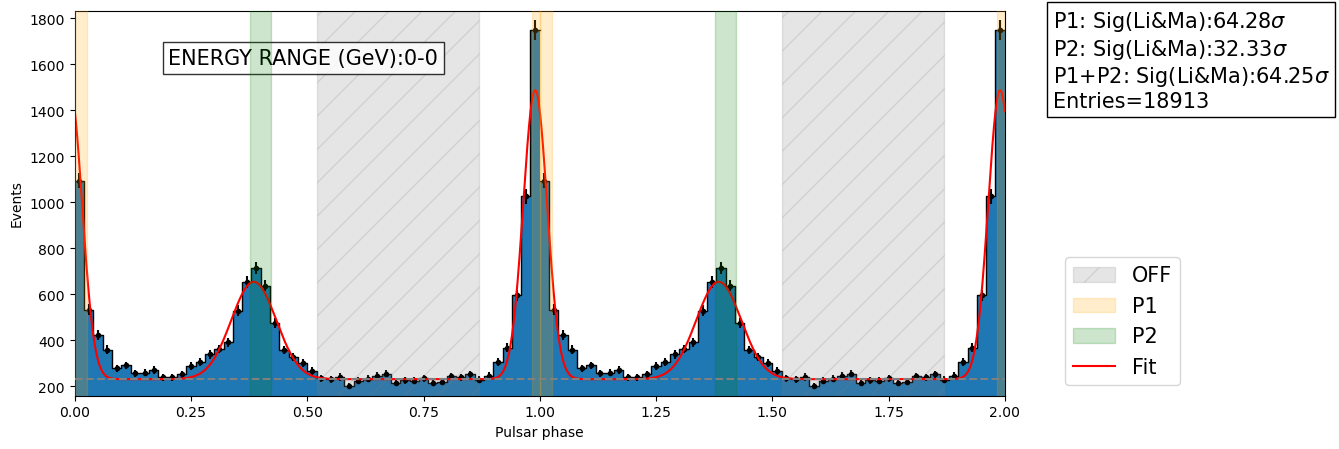

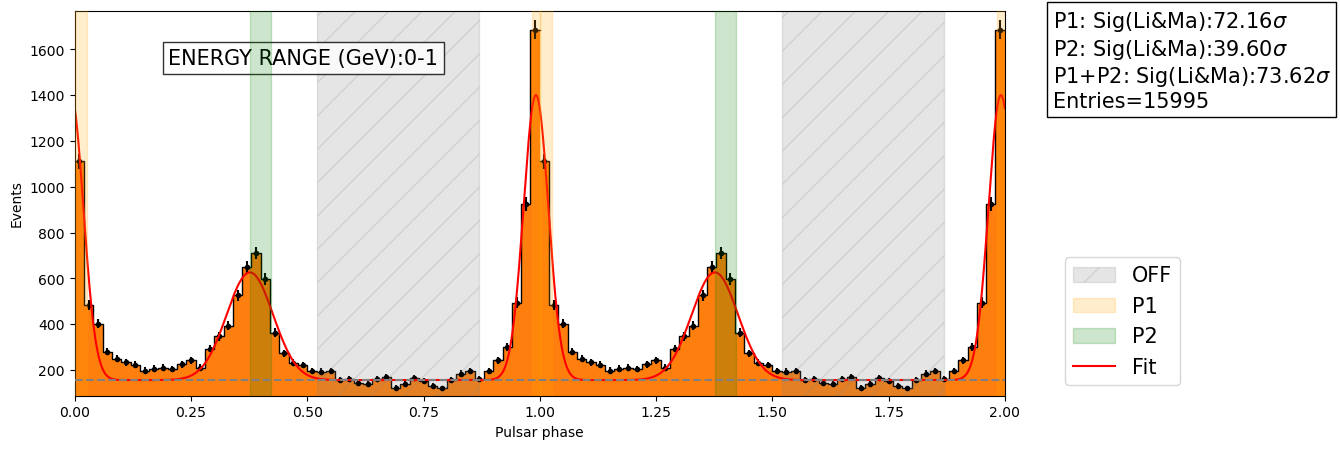

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

In [80]:
h.show_lcVsEnergy()

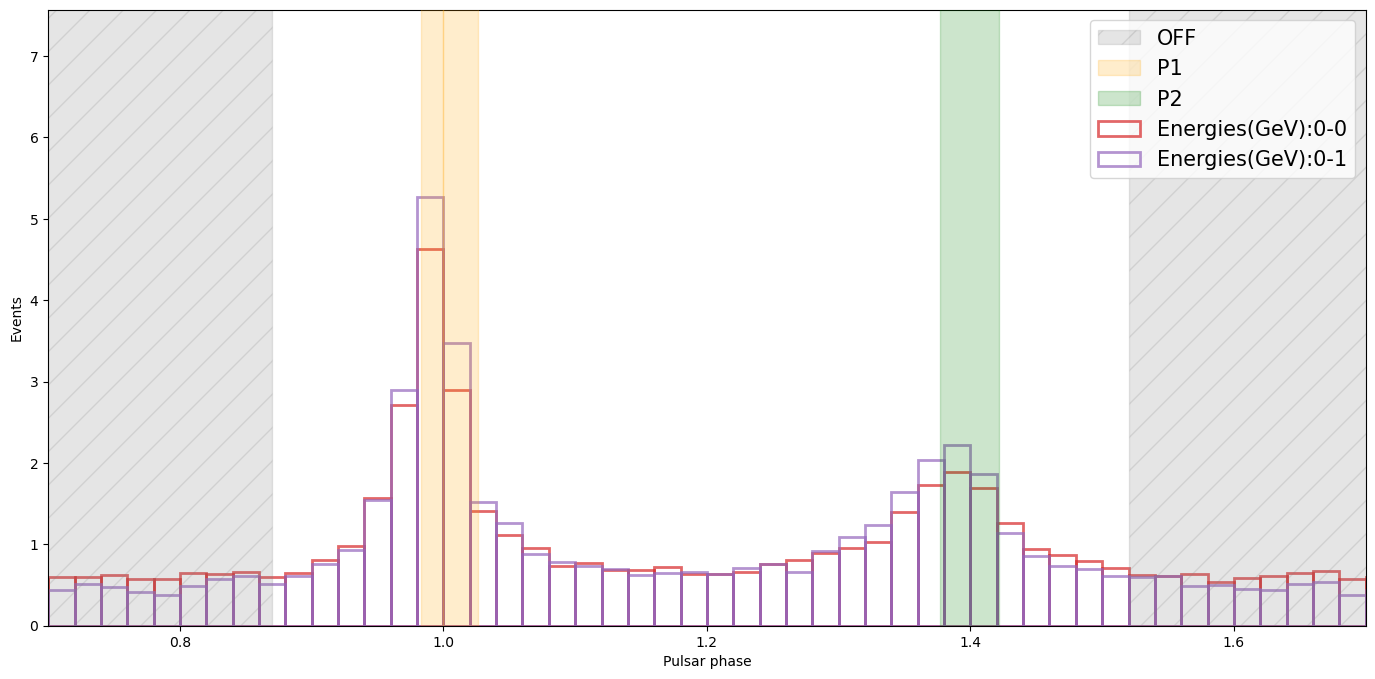

In [81]:
energy_lc=h.show_all_lc(ylimits=None)

In [82]:
energy_results=h.show_EnergyPresults()

Energies(GeV):0-0

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2        P1+P2
Significance    64.283110    32.326941    64.254439
Nex           2329.814286   994.642857  3324.457143
Nex_error       53.751332    39.787330    67.825823
Number        2828.000000  1516.000000  4344.000000
noff           498.185714   521.357143  1019.542857
sign_t_ratio   621.192620   312.387765   620.915556
s/n ratio      104.382013    43.561167   104.116125

P1/P2 ratio=2.34+/-0.11


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test      Zn_test        H_test
Statistic               9894.812087  9539.380325  1.016913e+04
p-value                    0.000000     0.000000  0.000000e+00
Number of $\sigma$              inf          inf           inf

 

-------------------------------------------------------------------
Energies(GeV):0-1

RESULTS FOR THE PEAK STATISTICS:

                       P1           P2        P1+P2
Significance    72.157101    39.6035

/fefs/aswg/workspace/alvaro.mas/software/miniconda3/envs/pulsar-test/lib/python3.9/site-packages/ptiming_ana/phaseogram/penergy_analysis.py:352: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/fefs/aswg/workspace/alvaro.mas/software/miniconda3/envs/pulsar-test/lib/python3.9/site-packages/ptiming_ana/phaseogram/penergy_analysis.py:504: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/fefs/aswg/workspace/alvaro.mas/software/miniconda3/envs/pulsar-test/lib/python3.9/site-packages/ptiming_ana/phaseogram/pulsar_analysis.py:463: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


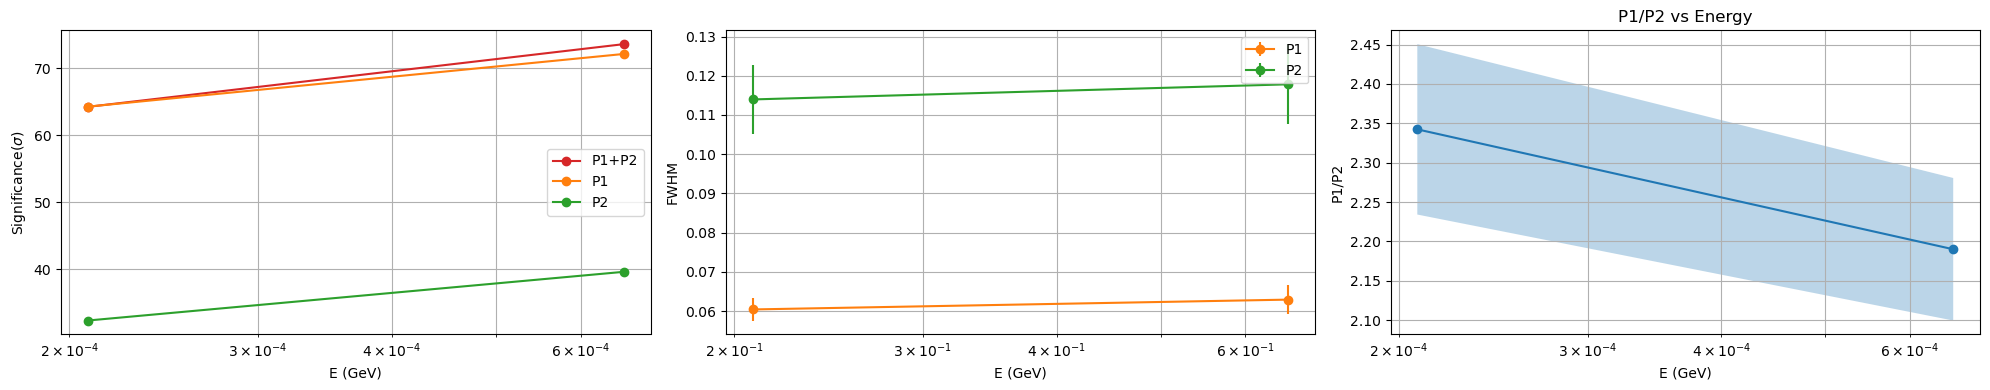

In [83]:
energy_plots=h.show_EnergyAna()

## Fit vs Energy

/fefs/aswg/workspace/alvaro.mas/software/miniconda3/envs/pulsar-test/lib/python3.9/site-packages/ptiming_ana/phaseogram/penergy_analysis.py:604: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


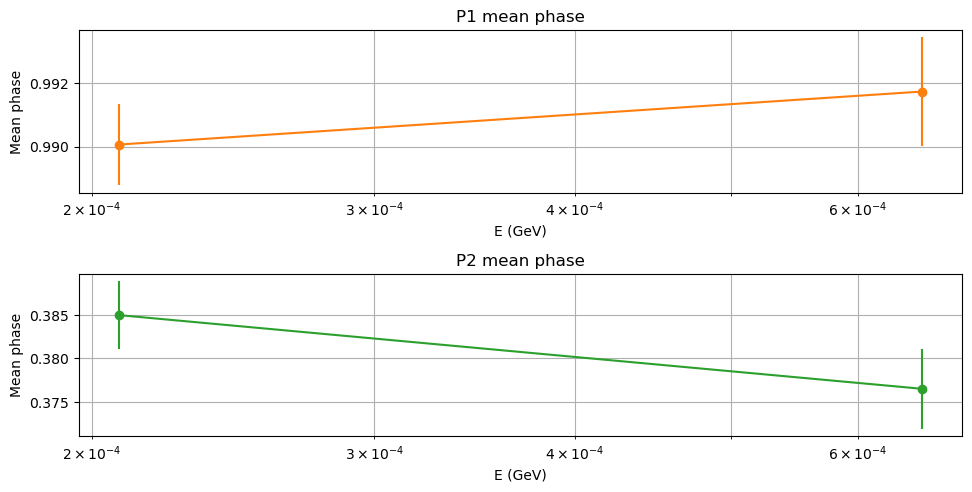

In [84]:
mean_energy_plot=h.show_meanVsEnergy()

In [85]:
h.show_EnergyFitresults()

Energies(GeV):0.10-0.32

      Name       Value     Error
0       mu    0.990063  0.001285
1    sigma    0.025656  0.001199
2     mu_2    0.384944  0.003914
3  sigma_2    0.048394  0.003781
4        A  231.375000  0.000000
5        B   80.803643  3.667235
6        C   51.361384  3.643984

 

-------------------------------------------------------------------
Energies(GeV):0.32-1.00

      Name       Value     Error
0       mu    0.991736  0.001710
1    sigma    0.026721  0.001598
2     mu_2    0.376496  0.004604
3  sigma_2    0.050032  0.004348
4        A  156.375000  0.000000
5        B   83.361603  4.920718
6        C   58.966409  4.809067

 

-------------------------------------------------------------------


[      Name       Value     Error
 0       mu    0.990063  0.001285
 1    sigma    0.025656  0.001199
 2     mu_2    0.384944  0.003914
 3  sigma_2    0.048394  0.003781
 4        A  231.375000  0.000000
 5        B   80.803643  3.667235
 6        C   51.361384  3.643984,
       Name       Value     Error
 0       mu    0.991736  0.001710
 1    sigma    0.026721  0.001598
 2     mu_2    0.376496  0.004604
 3  sigma_2    0.050032  0.004348
 4        A  156.375000  0.000000
 5        B   83.361603  4.920718
 6        C   58.966409  4.809067]